# Preprocessing for Hashtag Explorer

In [1]:
import pandas as pd
import sqlite3 as sql

conn = sql.connect('data/tweets.db')
twits = pd.read_sql('SELECT COUNT(DISTINCT(ID)) AS num_tweets FROM tweets ORDER BY created_at DESC', conn)
twits
conn.close()

,num_tweets
0,17100


In [2]:
tweets_all = pd.read_sql('SELECT DISTINCT * FROM tweets ORDER BY created_at ASC', conn)
tweets_all.head(10)

,ID,text,created_at,lang
0,1462146028400885760,RT @KaelenaTV: WHO'S READY TO PARTY?!\n\nJoin ...,2021-11-20 19:49:13+00:00,en
1,1462146041462116360,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:16+00:00,en
2,1462146073594576907,@Chillamint @DetectiveNibbs Dude ate mad Taco ...,2021-11-20 19:49:23+00:00,en
3,1462146080938893316,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:25+00:00,en
4,1462146078397063170,@OTKnetwork @RichWCampbell your current orange...,2021-11-20 19:49:25+00:00,en
5,1462146176451555335,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:48+00:00,en
6,1462146295859191822,trans day of letting the uber eats guy hit the...,2021-11-20 19:50:16+00:00,en
7,1462146330755751941,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:25+00:00,en
8,1462146371306278917,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:34+00:00,en
9,1462146399387234306,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:41+00:00,en


In [3]:
tweets_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17100 entries, 0 to 17099
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          17100 non-null  int64 
 1   text        17100 non-null  object
 2   created_at  17100 non-null  object
 3   lang        17100 non-null  object
dtypes: int64(1), object(3)
memory usage: 534.5+ KB


In [4]:
# RegEx Extraction of hashtags
import re

tweets_all['hashtag'] = tweets_all['text'].apply(lambda x: re.findall(r"#(\w+)", x))

In [5]:
tweets_all.head(10)

,ID,text,created_at,lang,hashtag
0,1462146028400885760,RT @KaelenaTV: WHO'S READY TO PARTY?!\n\nJoin ...,2021-11-20 19:49:13+00:00,en,[]
1,1462146041462116360,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:16+00:00,en,[]
2,1462146073594576907,@Chillamint @DetectiveNibbs Dude ate mad Taco ...,2021-11-20 19:49:23+00:00,en,[]
3,1462146080938893316,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:25+00:00,en,[]
4,1462146078397063170,@OTKnetwork @RichWCampbell your current orange...,2021-11-20 19:49:25+00:00,en,[]
5,1462146176451555335,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:48+00:00,en,[]
6,1462146295859191822,trans day of letting the uber eats guy hit the...,2021-11-20 19:50:16+00:00,en,[]
7,1462146330755751941,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:25+00:00,en,[]
8,1462146371306278917,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:34+00:00,en,[]
9,1462146399387234306,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:41+00:00,en,[]


In [6]:
import preprocessor as p
# cleaned tweet feature:
for i, t in enumerate(tweets_all['text']):
    tweets_all.loc[i, 'clean_text'] = p.clean(t)

In [7]:
tweets_all.head(10)

,ID,text,created_at,lang,hashtag,clean_text
0,1462146028400885760,RT @KaelenaTV: WHO'S READY TO PARTY?!\n\nJoin ...,2021-11-20 19:49:13+00:00,en,[],: WHO'S READY TO PARTY?!Join us for my Twitch ...
1,1462146041462116360,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:16+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...
2,1462146073594576907,@Chillamint @DetectiveNibbs Dude ate mad Taco ...,2021-11-20 19:49:23+00:00,en,[],Dude ate mad Taco Bell last night
3,1462146080938893316,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:25+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...
4,1462146078397063170,@OTKnetwork @RichWCampbell your current orange...,2021-11-20 19:49:25+00:00,en,[],your current orange logo looks like a taco bel...
5,1462146176451555335,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:48+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...
6,1462146295859191822,trans day of letting the uber eats guy hit the...,2021-11-20 19:50:16+00:00,en,[],trans day of letting the uber eats guy hit the...
7,1462146330755751941,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:25+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...
8,1462146371306278917,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:34+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...
9,1462146399387234306,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:41+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...


In [8]:
def zeroPunct(data):
    new_text = []
    for doc in data:
        new_doc = re.sub(r'[^\w\s]', '', (doc))
        new_text.append(new_doc)
    return new_text

In [9]:
# Digit removal, force text to lowercase
data = tweets_all['clean_text']
data = data.astype(str).str.replace('\d+', '')
data = data.str.lower()

tweets_all['no_puncts'] = zeroPunct(data)
tweets_all.head(10)

/var/folders/r5/kwzghqz92v73843mkcq0vhp40000gn/T/ipykernel_14241/3635669307.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  data = data.astype(str).str.replace('\d+', '')


,ID,text,created_at,lang,hashtag,clean_text,no_puncts
0,1462146028400885760,RT @KaelenaTV: WHO'S READY TO PARTY?!\n\nJoin ...,2021-11-20 19:49:13+00:00,en,[],: WHO'S READY TO PARTY?!Join us for my Twitch ...,whos ready to partyjoin us for my twitch part...
1,1462146041462116360,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:16+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...
2,1462146073594576907,@Chillamint @DetectiveNibbs Dude ate mad Taco ...,2021-11-20 19:49:23+00:00,en,[],Dude ate mad Taco Bell last night,dude ate mad taco bell last night
3,1462146080938893316,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:25+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...
4,1462146078397063170,@OTKnetwork @RichWCampbell your current orange...,2021-11-20 19:49:25+00:00,en,[],your current orange logo looks like a taco bel...,your current orange logo looks like a taco bel...
5,1462146176451555335,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:48+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...
6,1462146295859191822,trans day of letting the uber eats guy hit the...,2021-11-20 19:50:16+00:00,en,[],trans day of letting the uber eats guy hit the...,trans day of letting the uber eats guy hit the...
7,1462146330755751941,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:25+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...
8,1462146371306278917,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:34+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...
9,1462146399387234306,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:41+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...


In [12]:
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer

[nltk_data] Downloading package wordnet to /Users/ben/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/ben/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
lemmatizer = WordNetLemmatizer()
w_tokenizer = TweetTokenizer()
def lemma(text):
    return [(lemmatizer.lemmatize(w)) for w in w_tokenizer.tokenize((text))]

In [16]:
docs = tweets_all['no_puncts']

words = docs.apply(lemma)

In [17]:
words.head(10)

0    [who, ready, to, partyjoin, u, for, my, twitch...
1    [the, three, thing, tyler, joseph, is, passion...
2            [dude, ate, mad, taco, bell, last, night]
3    [the, three, thing, tyler, joseph, is, passion...
4    [your, current, orange, logo, look, like, a, t...
5    [the, three, thing, tyler, joseph, is, passion...
6    [trans, day, of, letting, the, uber, eats, guy...
7    [the, three, thing, tyler, joseph, is, passion...
8    [the, three, thing, tyler, joseph, is, passion...
9    [the, three, thing, tyler, joseph, is, passion...
Name: no_puncts, dtype: object

In [18]:
tweets_all['clean_words'] = words
tweets_all.head(10)

,ID,text,created_at,lang,hashtag,clean_text,no_puncts,clean_words
0,1462146028400885760,RT @KaelenaTV: WHO'S READY TO PARTY?!\n\nJoin ...,2021-11-20 19:49:13+00:00,en,[],: WHO'S READY TO PARTY?!Join us for my Twitch ...,whos ready to partyjoin us for my twitch part...,"[who, ready, to, partyjoin, u, for, my, twitch..."
1,1462146041462116360,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:16+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...,"[the, three, thing, tyler, joseph, is, passion..."
2,1462146073594576907,@Chillamint @DetectiveNibbs Dude ate mad Taco ...,2021-11-20 19:49:23+00:00,en,[],Dude ate mad Taco Bell last night,dude ate mad taco bell last night,"[dude, ate, mad, taco, bell, last, night]"
3,1462146080938893316,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:25+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...,"[the, three, thing, tyler, joseph, is, passion..."
4,1462146078397063170,@OTKnetwork @RichWCampbell your current orange...,2021-11-20 19:49:25+00:00,en,[],your current orange logo looks like a taco bel...,your current orange logo looks like a taco bel...,"[your, current, orange, logo, look, like, a, t..."
5,1462146176451555335,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:49:48+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...,"[the, three, thing, tyler, joseph, is, passion..."
6,1462146295859191822,trans day of letting the uber eats guy hit the...,2021-11-20 19:50:16+00:00,en,[],trans day of letting the uber eats guy hit the...,trans day of letting the uber eats guy hit the...,"[trans, day, of, letting, the, uber, eats, guy..."
7,1462146330755751941,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:25+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...,"[the, three, thing, tyler, joseph, is, passion..."
8,1462146371306278917,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:34+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...,"[the, three, thing, tyler, joseph, is, passion..."
9,1462146399387234306,RT @shlofolina: The Three Things Tyler Joseph ...,2021-11-20 19:50:41+00:00,en,[],: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...,"[the, three, thing, tyler, joseph, is, passion..."


In [19]:
stops = set(stopwords.words('english'))
tweets_all['clean_tokens'] = tweets_all['clean_words'].apply(lambda x: [w for w in x if w not in stops])

In [21]:
tweets_all[['clean_text', 'no_puncts', 'clean_words', 'clean_tokens']].head(10)

,clean_text,no_puncts,clean_words,clean_tokens
0,: WHO'S READY TO PARTY?!Join us for my Twitch ...,whos ready to partyjoin us for my twitch part...,"[who, ready, to, partyjoin, u, for, my, twitch...","[ready, partyjoin, u, twitch, partnerversary, ..."
1,: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...,"[the, three, thing, tyler, joseph, is, passion...","[three, thing, tyler, joseph, passionate, foot..."
2,Dude ate mad Taco Bell last night,dude ate mad taco bell last night,"[dude, ate, mad, taco, bell, last, night]","[dude, ate, mad, taco, bell, last, night]"
3,: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...,"[the, three, thing, tyler, joseph, is, passion...","[three, thing, tyler, joseph, passionate, foot..."
4,your current orange logo looks like a taco bel...,your current orange logo looks like a taco bel...,"[your, current, orange, logo, look, like, a, t...","[current, orange, logo, look, like, taco, bell..."
5,: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...,"[the, three, thing, tyler, joseph, is, passion...","[three, thing, tyler, joseph, passionate, foot..."
6,trans day of letting the uber eats guy hit the...,trans day of letting the uber eats guy hit the...,"[trans, day, of, letting, the, uber, eats, guy...","[trans, day, letting, uber, eats, guy, hit, bl..."
7,: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...,"[the, three, thing, tyler, joseph, is, passion...","[three, thing, tyler, joseph, passionate, foot..."
8,: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...,"[the, three, thing, tyler, joseph, is, passion...","[three, thing, tyler, joseph, passionate, foot..."
9,: The Three Things Tyler Joseph Is Passionate ...,the three things tyler joseph is passionate a...,"[the, three, thing, tyler, joseph, is, passion...","[three, thing, tyler, joseph, passionate, foot..."


In [27]:
clean_tweets = tweets_all[['ID', 'created_at', 'clean_words', 'clean_tokens']]

In [29]:
clean_tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17100 entries, 0 to 17099
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            17100 non-null  int64 
 1   created_at    17100 non-null  object
 2   clean_words   17100 non-null  object
 3   clean_tokens  17100 non-null  object
dtypes: int64(1), object(3)
memory usage: 534.5+ KB


In [45]:
clean_tweets.to_json('data/tokens.json')

In [46]:
df2 = pd.read_json('data/tokens.json')
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17100 entries, 0 to 17099
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   ID            17100 non-null  int64              
 1   created_at    17100 non-null  datetime64[ns, UTC]
 2   clean_words   17100 non-null  object             
 3   clean_tokens  17100 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 668.0+ KB


In [90]:

from gensim.models import word2vec

# Separate tokenized tweets from the remainder of the DataFrame
tokenized_tweets = [doc for doc in tweets_all['clean_tokens']]

# Set parameter values
feature_size = 200
window_ctxt = 50
min_word_count = 3
sample = 1e-3

# Define model
word2vec_model = word2vec.Word2Vec(tokenized_tweets, vector_size=feature_size, window=window_ctxt,
                                  min_count=min_word_count, sample=sample, epochs=50)

In [69]:
tweets_all.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17100 entries, 0 to 17099
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ID            17100 non-null  int64 
 1   text          17100 non-null  object
 2   created_at    17100 non-null  object
 3   lang          17100 non-null  object
 4   hashtag       17100 non-null  object
 5   clean_text    17100 non-null  object
 6   no_puncts     17100 non-null  object
 7   clean_words   17100 non-null  object
 8   clean_tokens  17100 non-null  object
dtypes: int64(1), object(8)
memory usage: 1.2+ MB


In [106]:
sims = {search_term: [item[0]
                     for item in word2vec_model.wv.most_similar([search_term], topn=30)]
       for search_term in ['love', 'best', 'digestive', 'lunch', 'worst', 'gross', 'favorite', 'hate']}

sims['digestive']

['system',
 'brick',
 'animal',
 'diet',
 'strong',
 'salt',
 'till',
 'temple',
 'hahaha',
 'university',
 'recovering',
 'healthy',
 'gross',
 'belland',
 'rlly',
 'ache',
 'dairy',
 'household',
 'bubble',
 'clap',
 'within',
 'chokehold',
 'masculine',
 'happens',
 'farted',
 'emotion',
 'peace',
 'tbh',
 'toilet',
 'vax']

In [94]:
from sklearn.manifold import TSNE
import numpy as np

terms = sum([[k] + v for k, v in sims.items()], [])
wvs = word2vec_model.wv[terms]

# watch_terms = sum([[k] + v for k, v in sims.items()], [])
# wvs2 = word2vec_model.wv[watch_terms]

In [102]:
tsne = TSNE(n_components=3, random_state=42, n_iter=10000, perplexity=10)
np.set_printoptions(suppress=True)
T = tsne.fit_transform(wvs)
labels = terms

/Users/ben/Benborg/ads_tweetapp/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/ben/Benborg/ads_tweetapp/venv/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


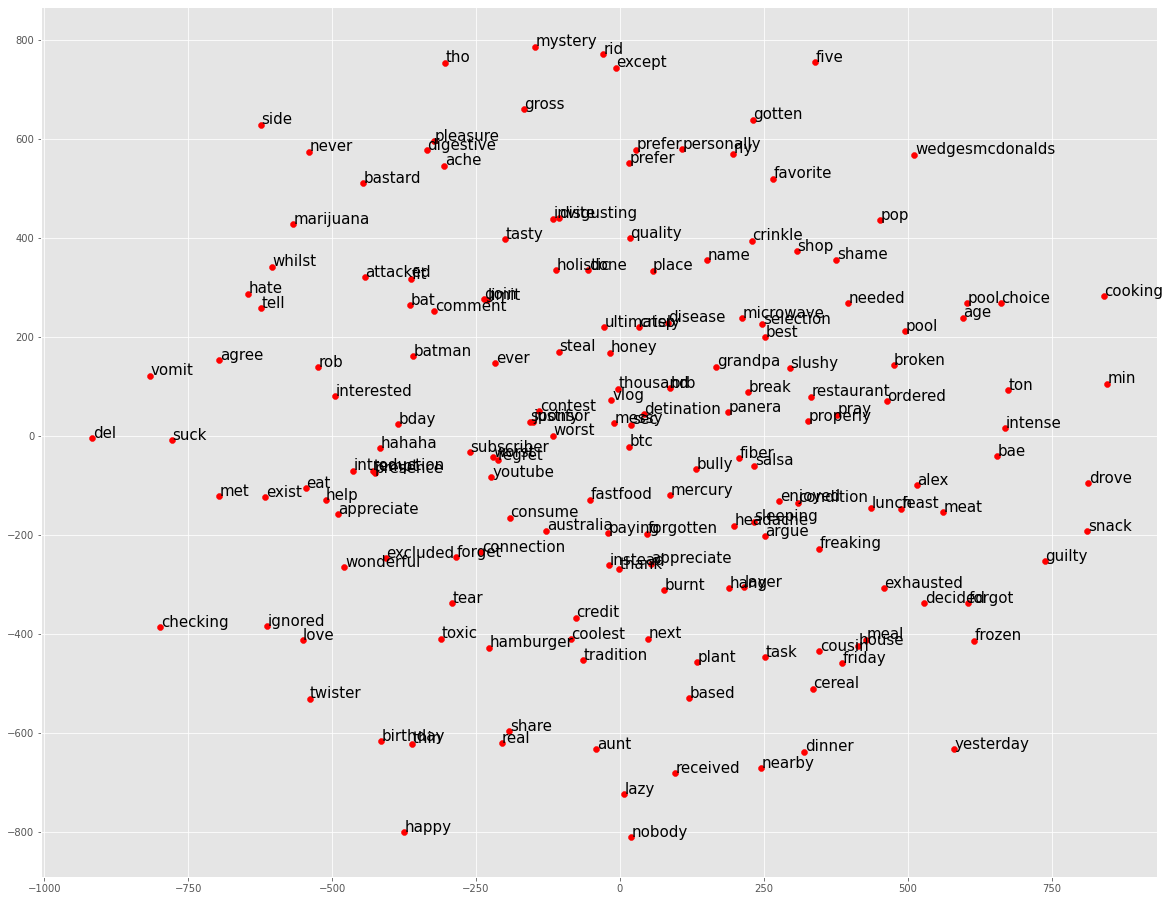

In [103]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20, 16))
plt.style.use('ggplot')

ax.scatter(T[:, 0], T[:, 1], c='red')

for label, x, y in zip(labels, T[:, 0], T[:, 1]):
    ax.annotate(label, xy=(x+1, y+1), xytext=(0, 0), textcoords='offset points', fontsize=15)
    
plt.show()

In [95]:
hash_sr = tweets_all['hashtag']
hash_sr.describe()

count     17100
unique      354
top          []
freq      16576
Name: hashtag, dtype: object

In [119]:
# hash_list = [h[i] for i in range(len(h)) for h in hash_sr if len(h) > 0]
hash_list = []
for i in range(len(hash_sr)):
    if len(hash_sr[i]) > 0:
        n = len(hash_sr[i])
        for j in range(n):
            hash_list.append(hash_sr[i][j])

In [121]:
hash_list[0:10], len(hash_list)

(['PokemonBDSP',
  'PokemonShiningPearl',
  'NintendoSwitch',
  'PokemonShiningPearl',
  'NintendoSwitch',
  'moqb',
  'quizbowl',
  'wasteful',
  'LesserKnownRivalries',
  'LesserKnownRivalries'],
 979)

In [122]:
uni_hash = pd.unique(hash_list)

In [126]:
uni_hash.shape

(599,)

## FastText Model from gensim

* Allows for dynamic word vector lookup;
* Generally better with *syntactic* tasks than `word2Vec`, but performs very well in comparison on *semantic* tasks when datasets are larger.


In [53]:
corpus = pd.read_json('/Users/ben/Benborg/ads_tweetapp/data/tokens.json')

In [54]:
corpus.head(10)

,ID,created_at,clean_words,clean_tokens
0,1462146028400885760,2021-11-20 19:49:13+00:00,"[who, ready, to, partyjoin, u, for, my, twitch...","[ready, partyjoin, u, twitch, partnerversary, ..."
1,1462146041462116360,2021-11-20 19:49:16+00:00,"[the, three, thing, tyler, joseph, is, passion...","[three, thing, tyler, joseph, passionate, foot..."
2,1462146073594576907,2021-11-20 19:49:23+00:00,"[dude, ate, mad, taco, bell, last, night]","[dude, ate, mad, taco, bell, last, night]"
3,1462146080938893316,2021-11-20 19:49:25+00:00,"[the, three, thing, tyler, joseph, is, passion...","[three, thing, tyler, joseph, passionate, foot..."
4,1462146078397063170,2021-11-20 19:49:25+00:00,"[your, current, orange, logo, look, like, a, t...","[current, orange, logo, look, like, taco, bell..."
5,1462146176451555335,2021-11-20 19:49:48+00:00,"[the, three, thing, tyler, joseph, is, passion...","[three, thing, tyler, joseph, passionate, foot..."
6,1462146295859191822,2021-11-20 19:50:16+00:00,"[trans, day, of, letting, the, uber, eats, guy...","[trans, day, letting, uber, eats, guy, hit, bl..."
7,1462146330755751941,2021-11-20 19:50:25+00:00,"[the, three, thing, tyler, joseph, is, passion...","[three, thing, tyler, joseph, passionate, foot..."
8,1462146371306278917,2021-11-20 19:50:34+00:00,"[the, three, thing, tyler, joseph, is, passion...","[three, thing, tyler, joseph, passionate, foot..."
9,1462146399387234306,2021-11-20 19:50:41+00:00,"[the, three, thing, tyler, joseph, is, passion...","[three, thing, tyler, joseph, passionate, foot..."


In [65]:
from gensim.models.fasttext import FastText
from gensim.test.utils import datapath

# corpus = datapath('/Users/ben/Benborg/ads_tweetapp/data/tokens.json')

model = FastText(vector_size=10, window=3, min_count=1, epochs=20)

model.build_vocab(corpus['clean_tokens'])

print(model)


FastText(vocab=12385, vector_size=10, alpha=0.025)


In [67]:
model.train(
    corpus_iterable=corpus['clean_tokens'], epochs=model.epochs, 
    total_examples=model.corpus_count, total_words=model.corpus_total_words
)

(2446830, 3270980)

In [71]:
from gensim.test.utils import get_tmpfile

fname = get_tmpfile('/Users/ben/Benborg/ads_tweetapp/data/ft_mod.model')
model.save(fname)

In [75]:
ftModel = FastText.load('data/ft_mod.model')

In [91]:
similars = ftModel.wv.most_similar(positive=['supreme'], negative=['shit'], topn=25)
similars

[('nc', 0.767032265663147),
 ('pnc', 0.687616229057312),
 ('layer', 0.6833054423332214),
 ('lr', 0.6574816703796387),
 ('xl', 0.6447835564613342),
 ('forced', 0.6412323117256165),
 ('e', 0.6292809844017029),
 ('suspect', 0.6233478784561157),
 ('topped', 0.6079060435295105),
 ('located', 0.5962507724761963),
 ('suspected', 0.5931413769721985),
 ('layered', 0.5892760753631592),
 ('locos', 0.584794819355011),
 ('followup', 0.5818554162979126),
 ('stockpiled', 0.5798112154006958),
 ('cropped', 0.5773322582244873),
 ('doubled', 0.5768418908119202),
 ('followed', 0.5749914050102234),
 ('rolled', 0.574971079826355),
 ('popped', 0.5715105533599854),
 ('branded', 0.5699270367622375),
 ('checker', 0.5674147605895996),
 ('pictured', 0.5628303289413452),
 ('cheered', 0.5617258548736572),
 ('crisp', 0.5575071573257446)]